In [1]:
url1='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(url1,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1100bf7d0>)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
medical_df=pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

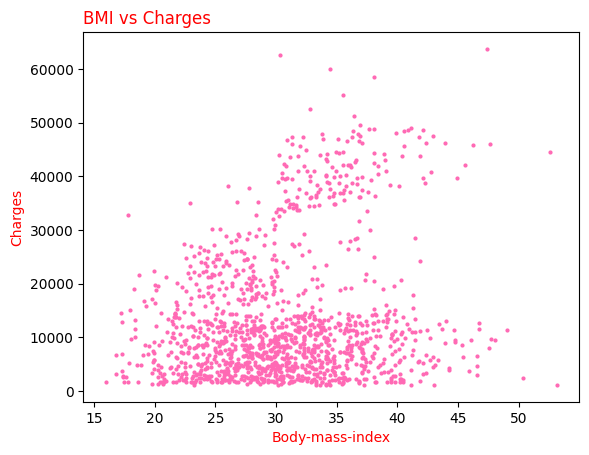

In [22]:
plt.scatter(medical_df['bmi'],medical_df['charges'],color="hotpink",s=4)
plt.xlabel("Body-mass-index",color="red")
plt.ylabel("Charges",color="red")
plt.title("BMI vs Charges",loc="left",color="red")
plt.show()

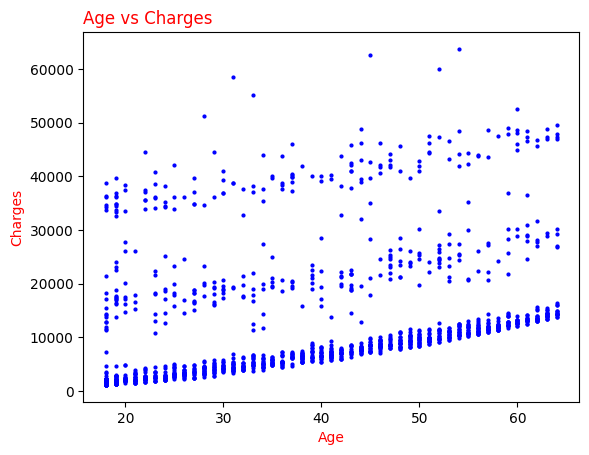

In [24]:
plt.scatter(medical_df['age'],medical_df['charges'],color="blue",s=4)
plt.xlabel("Age",color="red")
plt.ylabel("Charges",color="red")
plt.title("Age vs Charges",loc="left",color="red")
plt.show()

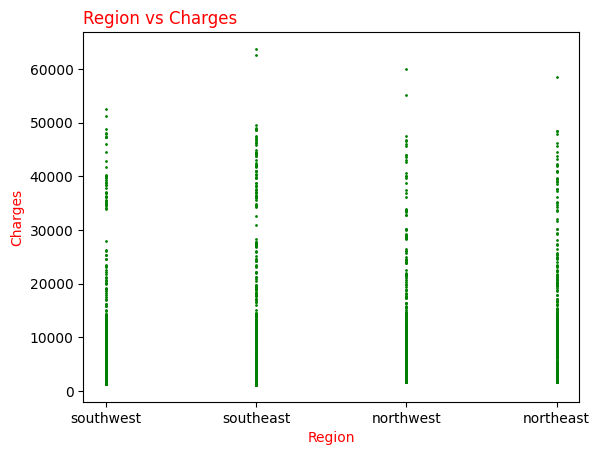

In [27]:
plt.scatter(medical_df['region'],medical_df['charges'],color="green",s=1)
plt.xlabel("Region",color="red")
plt.ylabel("Charges",color="red")
plt.title("Region vs Charges",loc="left",color="red")
plt.show()

In [28]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [29]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [30]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [35]:
import seaborn as sns

In [39]:
gender_values = {'female': 0, 'male': 1}
gender_numeric = medical_df.sex.map(gender_values)
medical_df.charges.corr(gender_numeric)

0.05729206220202533

In [49]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [50]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']

In [51]:

from sklearn import linear_model

In [52]:
model = linear_model.LinearRegression()


In [53]:
model.fit(inputs,targets)

LinearRegression()

In [55]:
print(model.coef_)


[267.24891283]


In [56]:
print(model.intercept_)

-2091.420556565021


In [57]:
predicted_val=model.predict(inputs)

In [65]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [68]:

from sklearn.metrics import mean_squared_error


In [71]:

mse = mean_squared_error(targets, predicted_val)
rmse = np.sqrt(mse)

In [72]:
print(rmse)

4662.505766636395


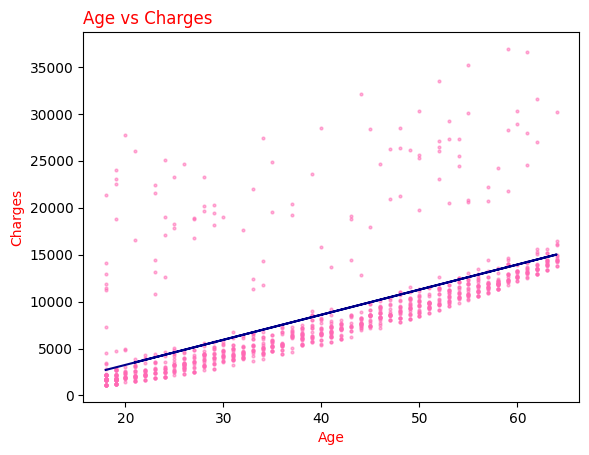

In [78]:
plt.scatter(non_smoker_df['age'],non_smoker_df['charges'],color="hotpink",alpha=0.5,s=4)
plt.xlabel("Age",color="red")
plt.ylabel("Charges",color="red")
plt.title("Age vs Charges",loc="left",color="red")
plt.plot(inputs,predicted_val,color="darkblue")
plt.show()

In [83]:
inputs1, targets1 = medical_df[['age', 'bmi', 'children']], medical_df['charges']

model1 = linear_model.LinearRegression()

model1.fit(inputs1,targets1)
predictions1 = model1.predict(inputs1)


loss = np.sqrt(mean_squared_error(targets1, predictions1))
print('Loss:', loss)

Loss: 11355.317901125973


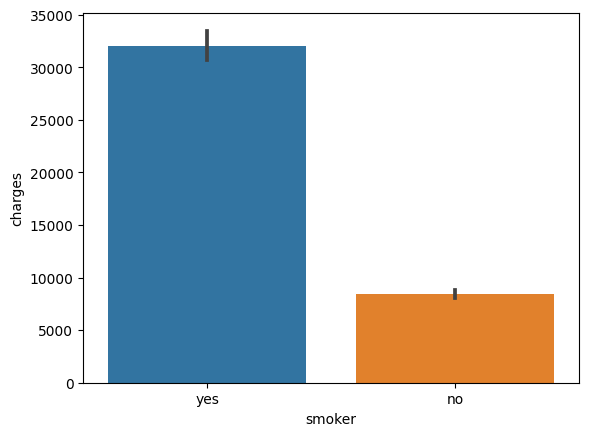

In [84]:
sns.barplot(data=medical_df, x='smoker', y='charges');

<Axes: xlabel='sex', ylabel='charges'>

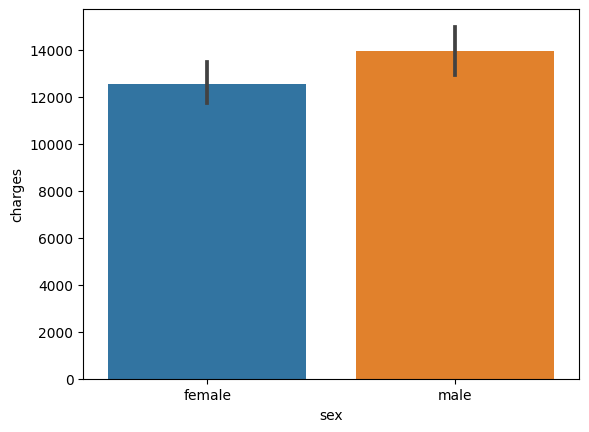

In [85]:
sns.barplot(data=medical_df, x='sex', y='charges')

<Axes: xlabel='region', ylabel='charges'>

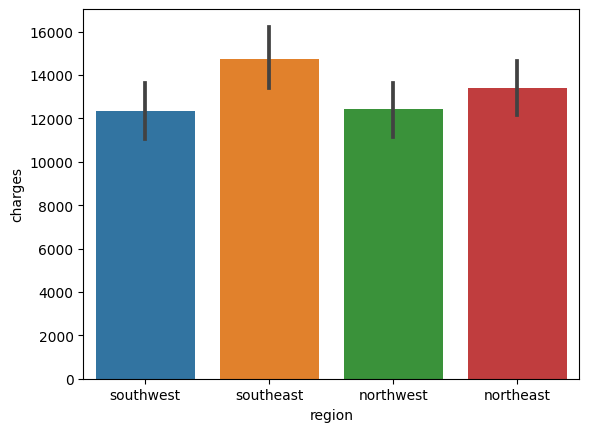

In [87]:
sns.barplot(data=medical_df, x='region', y='charges')

<Axes: xlabel='children', ylabel='charges'>

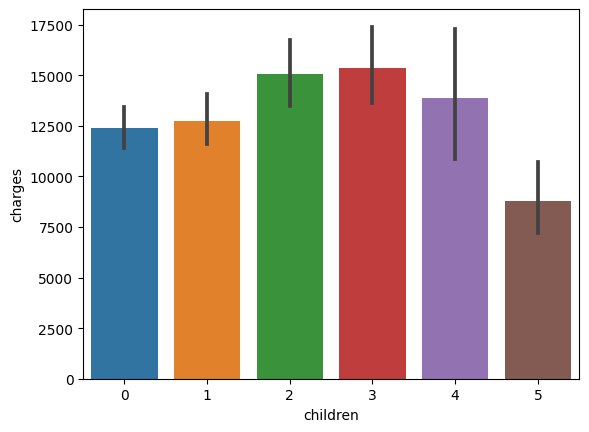

In [88]:
sns.barplot(data=medical_df, x='children', y='charges')

In [90]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
inputs2, targets2 = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model2 = linear_model.LinearRegression()
model1.fit(inputs2,targets2)
predictions2 = model1.predict(inputs2)
loss2 = np.sqrt(mean_squared_error(targets2, predictions2))
print('Loss:', loss2)

Loss: 6056.439217188081
